## Lecture 8

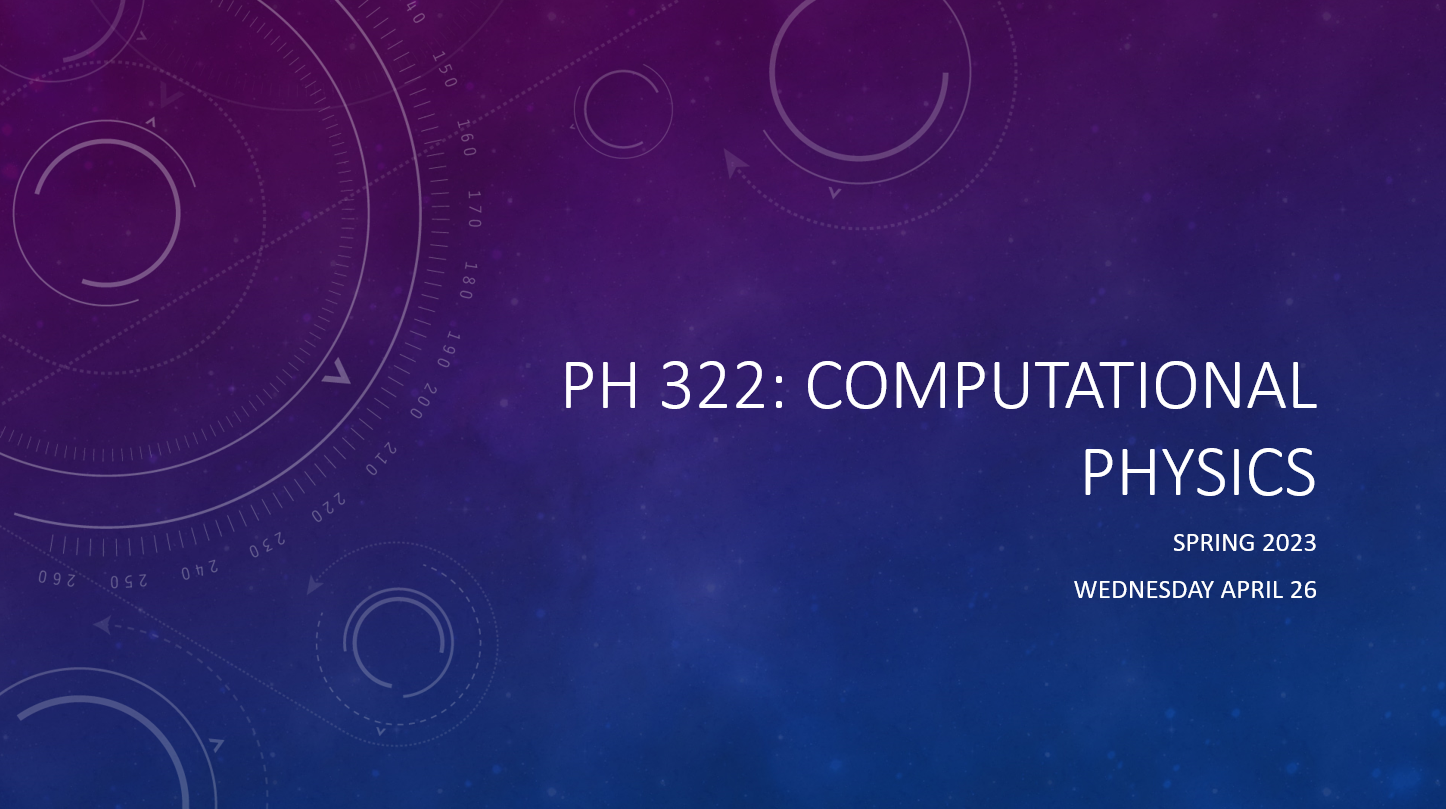

* Questions??
* HW4 



**Today**
* Integrals over infinite range
* Multiple integrals
* Numerical differentiation


**Exercise 5.11**

Suppose a plane wave, such as light or a sound wave, is
blocked by an object with a straight edge, represented by the solid line at
the bottom of this figure:


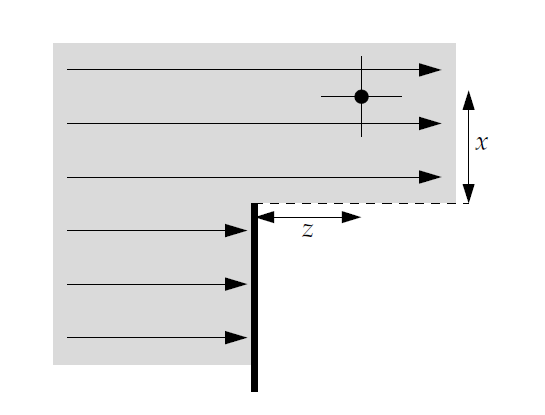


The wave will be diffracted at the edge and the resulting intensity at the
position $(x,z)$ marked by the dot is given by near-field diffraction
theory to be

$$
I = \frac{I_0}{8} \Bigl( \bigl[ 2C(u) + 1 \bigr]^2 +
                        \bigl[ 2S(u) + 1 \bigr]^2 \Bigr),
$$

where $I_0$ is the intensity of the wave before diffraction and

$$
u = x \sqrt{2\over\lambda z}\,, \qquad
C(u) = \int_0^u \cos \frac{1}{2}\pi t^2 dt, \qquad
S(u) = \int_0^u \sin \frac{1}{2}\pi t^2 dt.
$$


Write a program to calculate $I/I_0$ and make a plot of it as a function
of $x$ in the range $-5\,$m to $5\,$m for the case of a sound wave with
wavelength $\lambda=1\,$m, measured $z=3\,$m past the straight edge.
Calculate the integrals using Gaussian quadrature with $N=50$ points.  You
should find significant variation in the intensity of the diffracted
sound---enough that you could easily hear the effect if sound were
diffracted, say, at the edge of a tall building.


**Strategy**

1. The problem tells us to plot the intensity as a function of $x$ at position $z$. So let's create 1D arrays to hold the $x$-positions and intensities at each $x$.

2. We see that $u$ is a function of $x$. Using array math we can calculate $u$ for all values of $x$ in one line of code.

3. $C$ and $S$ are both functions of $u$. We can also calculate $C$ and $S$ for all values of $u$ in a single line, if we write functions to perform both integrations. 

4. We will also need to write separate functions for the integrands of $C$ and $S$. 

5. Once we have $C$ and $S$ calculated, we can calculate $I$ for all values of $x$ in one step.

6. Finally we plot I vs. x.

The main body of this program will be quite short. Most of the work will be writing the functions to find $C$ and $S$.

Once we get this code working, we can easily adapt it to calculate $I(x,z)$ across the entire $xz$-plane and visualize the diffraction pattern with *imshow*.


In [ ]:
# Exercise 5.11. Program to calculate the diffraction of a wave using 
# Gaussian Quadrature.

# import what we need
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxw

# define function for integrand of C
def fC(t):
    theta = 0.5*np.pi*t**2
    return np.cos(theta)

# define function for integrand of S
def fS(t):
    theta = 0.5*np.pi*t**2
    return np.sin(theta)

def integralC(u,x,w):
    xp = 0.5*u*x+0.5*u
    wp = 0.5*u*w
    C = 0
    return sum(wp*fC(xp))

def integralS(u,x,w):
    xp = 0.5*u*x+0.5*u
    wp = 0.5*u*w
    return sum(wp*fS(xp))
   
    

# define wavelength, m
l = 1.0
# define position z, m
z = 3.0

# set the number of sampling points for Gaussian quadrature   
Nxk = 50
# get the location and weights of sampling points over interval (-1,1)
xg,wg = gaussxw(Nxk)

# create an array of xvalues
N = 100
xvalues = np.linspace(-5,5,N)
C = np.empty([N], float)
S = np.empty([N], float)

# calculate u for all xvalues
for i in range(N):
    u = xvalues[i]*np.sqrt(2/(l*z))
    C[i] = integralC(u,xg,wg)
    S[i] = integralS(u,xg,wg)


I_rel = (1/8)*( (2*C+1)**2 + (2*S+1)**2 ) 

plt.plot(xvalues, I_rel)
plt.xlabel("x, m")
plt.ylabel("I/I_o")

So we see diffraction pattern fringes. The sound intensity changes over a small distance. 

We can extend our code such that it calculates the diffraction pattern across the entire xz plane with just a little bit more effort.

Now instead of just looping across the x-dimension, we also loop across the z-dimension. 

In [ ]:
# Exercise 5.11. Program to calculate the diffraction of a wave using 
# Gaussian Quadrature.

# Calculate diffraction pattern across the xz-plane. 

# define wavelength, m
l = 1

# create an array of xvalues and zvalues
N = 300
xmin = -2
xmax = 5
zmin = 1
zmax = 5
xvalues = np.linspace(xmin,xmax,N)
zvalues = np.linspace(zmin,zmax,N)

C = np.empty([N,N], float)
S = np.empty([N,N], float)

# calculate u for all xvalues
for j in range(N):
    for i in range(N):
        u = xvalues[i]*np.sqrt(2/(l*zvalues[j]))
        C[i,j] = integralC(u,xg,wg)
        S[i,j] = integralS(u,xg,wg)


I_rel = (1/8)*( (2*C+1)**2 + (2*S+1)**2 ) 

plt.imshow(I_rel, origin="lower",  extent=[zmin, zmax, xmin, xmax])
plt.xlabel("z, m")
plt.ylabel("x, m")
plt.colorbar()

### Integrals over infinite range

There are many integrals in physics problems that are evaluated over an infinite range. For example, let's look at one of our homework problems.

**Exercise 5.12**

The Planck theory of thermal radiation tells us that in the
(angular) frequency interval $\omega$ to $\omega+d\omega$, a black body
of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)d\omega$, where

$$
  I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over(e^{\hbar\omega/k_BT}-1)}.
$$

Here $\hbar$ is Planck's constant over~$2\pi$, $c$~is the speed of light,
and $k_B$ is Boltzmann's constant.

The total energy per unit area radiated by a black body is
$$
W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^{x-1}}dx.
$$

Write a program to evaluate the integral in this expression.

Using one of the integration methods we have learned so far would require an infinite number of sampling points. So what are we to do?

The trick is to use a change in integration variables so we can map the infinite interval to a finite interval.

For an integration range from $0$ to $\infty$ the standard change of variables is:

$
z = {x \over {1+x}}
$ 

The integration limits then become:

$
x=0 \rightarrow z=0
$

$
x=\infty \rightarrow z=1
$

To find the new integrand, we need to express $dx$ in terms of $dz$, so first solve the above expression for $x$:

$
x = z(1+x)
$

$
= z + xz
$

$
x-xz = z
$

$x(1-z) = z
$

$x = {z \over {1-z}}
$

The differential $dx$ is then:

$
dx = d(z(1-z)^{-1})
$

$
= \left(z(1-z)^{-2} + (1-z)^{-1}\right)dz
$

$
=\left({z \over {(1-z)^2}} + {1 \over {1-z}}\right)dz
$

$
= {z + (1-z) \over {(1-z)^2}} dz
$

$
= {1 \over {(1-z)^2}} dz
$

The integral then becomes:

$$
\int_0^{\infty} f(x) dx \rightarrow \int_0^1 f({z \over {1-z}}) {1 \over {(1-z)^2}} dz
$$

or

$$
\int_0^1 \frac{ f({z \over {1-z}})} {(1-z)^2} dz
$$


This is a finite interval so we can use any of our integration techniques to evalute. 

Let's test this out using the integral:

$
I = \int_0^\infty e^{-t^2}dt
$

Make a change of variable:

$
z = \frac{t}{1+t}
$

$
t = \frac{z}{1-z}
$

z = 0,1

$
dt = \frac{dz}{1-z^2}
$

With a change of variable from $t$ to $z$ this becomes:

$
I = \int_0^1 \frac{e^{-({z \over {1-z}})^2}}{(1-z)^2}dz
$

At first glance, it certaintly isn't obvious that these two integrals are equivalent. To verify and build some intuition, let's plot both integrands and compare.

In [ ]:
# plot integrands of two equivlent integrals after a change of variable

import numpy as np
import matplotlib.pyplot as plt

# define original integrand
def f_org(t):
    return np.exp(-t*t)

# define new integrand after change of variable
def f_new(z):
    return np.exp(-(z/(1-z))**2)/(1-z)**2


Np=1000
# create t values from t=0,5
tvalues = np.linspace(0, 5, Np)
# calculate y-values from original integrand
y_org = f_org(tvalues)

# create z values. 
# Note at z=1, the integrand denominator=0, so use upper limit
# just below 1
zvalues = np.linspace(0,0.99999, Np)
# calculate y-values from original integrand
y_new = f_new(zvalues)

#plot 
plt.plot(tvalues, y_org, label="original")
plt.plot(zvalues, y_new, label="change")
plt.legend()

We see that even though the integrands look different, the area under the integrands over their respective intervals looks to be the same. 

So now let's go ahead and calculate the integral using Gaussian quadrature.

In [ ]:
# calculate integral with infinite interval using a change of variables and
# Gaussian quadrature

import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

# define new integrand after change of variable
def f_new(z):
    return np.exp(-(z/(1-z))**2)/(1-z)**2

# define integration range
a = 0
b = 1

# define number of sampling points
N = 50

# calculate scaled sampling points and weights
xp, wp = gaussxwab(N,a,b)

I_for=0
for k in range(N):
    I_for +=wp[k]*f_new(xp[k])
    
# Note instead of using a for loop to calculate the sum in the Gaussian quadrature, we can use the numpy sum function:
I_npsum = np.sum(wp*f_new(xp))
    
print(f"I_for = {I:.5f}. I_npsum={I_npsum:.5f}")


Compare this result to the area under the integrands in the above plot. Looks to be about right.

The exact value of the integral is ${1 \over 2} \sqrt{\pi} = 0.886226925453$.

Note: Unlike the trapezoidal rule and Simpson's rule there are no general equations we can use to estimate the error on the integral calculated using Gaussian quadrature. 

In general this isn't a problem because the Gaussian quadrature method is so accurate that we don't need that many sampling points to get a very accurate estimate of the integral (typically N<100).

Also, the accuracy of the estimate increases rapidly with N. Generally the approximation error improves by a factor of $~1/N^2$ as we increase N by 1. So if we increase N from 5 to 6, the approximation error decreases by a factor on the order of 25, or if we increase N from 10 to 11, it will decrease by a factor of 100.

Because the accuracy increases so rapidly with N, if we were to repeat the calculation using 2N sampling points (call this estimate $I_2$. , $I_2$ would be so much more accurate than $I_1$, we can treat $I_2$ as being the true value of $I$, so the approximation error on $I_1$ could be estimated as $I_2-I_1$.

Let's try this out for the above integral. We will first calculate the integral using 50 sampling points as above, then double the number of sampling points:

In [ ]:
# estimate the approximation error of Gaussian quadrature using the doubling method

import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

# define new integrand after change of variable
def f_new(z):
    return np.exp(-(z/(1-z))**2)/(1-z)**2

# define integration range
a = 0
b = 1
N = 5

# first calculate I1 using N sampling points  
xp, wp = gaussxwab(N,a,b)
I1 = np.sum(wp*f_new(xp))

# next calculate I2 using 2N sampling points  
xp, wp = gaussxwab(2*N,a,b)
I2 = np.sum(wp*f_new(xp))

# calculate approximation error on I1
error = np.abs(I2-I1)

# calculate true error on I1
true_error = np.abs(0.5*np.sqrt(np.pi)-I1)

print(f"I1 = {I1:.16f}. I2={I2:.16f}. Error on I1 is about {error:0.16f}")
print(f"The true error is {true_error}.")

How many sampling points does it take to get the solution to within numerical precision?

Remember the numerical precision of a float $x$ is roughly equal to error constant $C$ times $x$.

In [ ]:
# Investigate accuracy of Gaussian quadrature
# plot N vs accuracy

import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

# define new integrand after change of variable
def f_new(z):
    return np.exp(-(z/(1-z))**2)/(1-z)**2

# define integration range
a = 0
b = 1

# calculate the numerical uncertainty of estimate based on the true value of the integral
true = 0.5*np.sqrt(np.pi)
C = 1e-16
epsilon = C*true

# create empty lists to hold values of N, error
Nlist = []
error =[]

# initialize variables
N=0
I=0
# increase N by 1 until the approximation error is less than numerical error
while abs(true-I) > epsilon:
    N += 1
    # calculate scaled sampling points and weights
    xp, wp = gaussxwab(N,a,b)
    I = np.sum(wp*f_new(xp))
    error.append(abs(true-I))
    Nlist.append(N)

# print out next to last N, error since last values are below limit required
print(f"N={Nlist[N-2]} error={error[N-2]}")
plt.plot(Nlist[:-1], error[:-1])
plt.xlabel("Number of sampling points")
plt.ylabel("Absolute error")
plt.yscale("log")

Again, we see the remarkable power of the Gaussian quadrature method. We have reached numerical precision on our estimate with only 70 sampling points. 


Let's also plot the sampling points and the weights used by the Gaussian quadrature

In [ ]:
# plot the sampling points and weights of the Gaussian quadrature for the integral above

ax1 = plt.gca()
ax2 = ax1.twinx()

# plot the integrand
ax1.plot (zvalues, y_new)

# Plot the weights on second y-axis
for i in range(0,len(xp)):
    ax2.plot ([xp[i],xp[i]], [0,wp[i]], '-')

Again we see the sampling points are spaced close together at the ends of the interval and farther apart near the middle. However the weights are larger near the middle, so even though the function is not being sampled here as often, these points contribute more to the sum than the end points. 

**Other infinite integral ranges**

There are other change of variables we can make for other infinite integration intervals. See the textbook for details. Here I just list a summary.

|Interval range| Change of variable| Integral |
|:-------------:|:-------------------:|:--------------------------------:|
|$-\infty \rightarrow a$|$x=-\frac{z}{1+z}$|$\int_{-1}^0\frac{-1}{(1+z)^2}f\left(\frac{-z}{1+z}+a\right)dz$
|$a\rightarrow \infty$|$x=\frac{z}{1-z}+a$|$\int_0^1\frac{1}{(1-z)^2}f\left(\frac{z}{1-z}+a\right)dz$|
|$-\infty \rightarrow \infty$|$x=\frac{z}{1-z^2}$|$\int_{-1}^{1}\frac{1+z^2}{(1-z^2)^2}f(\frac{z}{1-z^2})dz$|

Note: I don't know how to prevent line breaks in the table

### Multiple integrals

Many physics problems require us to calculate a double or triple integral. This is often the case when we wish to calculate fields or forces from two and three dimensiononal objects. For example the homework problem in **Exercise 5.14** is to calculate the gravitational force on a point mass a distance $z$ above a sheet of metal with sides of length $L$. The force is given by the integral:

$$
F_z = G\sigma z \int_{-L/2}^{L/2}\int_{-L/2}^{L/2} {d x\,d y\over(x^2+y^2+z^2)^{3/2}}\,,
$$

where $\sigma$ is the surface mass density.

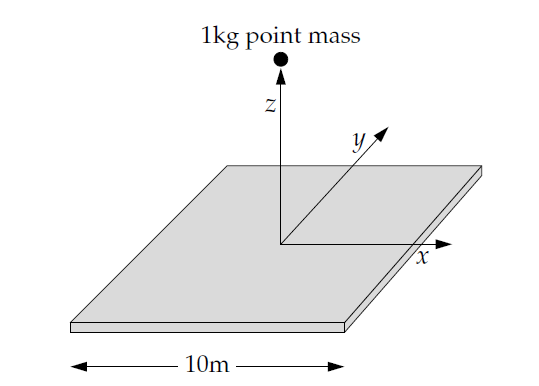

Since each unit area of the sheet contributes to the gravitational force at the point, we calculate the total force from the sum of the gravitational force caused by each differential mass unit $dm=\sigma dxdy$.



Let's look at the generic double integral:

$$
I = \int_0^1\int_0^1f(x,y)dxdy
$$

We can write the first integral as an integral over the x-axis for a particular choice of $y$:

$$
F(y) = \int_o^1f(x,y)dx
$$

Then the second integral is just an integral of $F(y)$ over the y-interval:

$$
I = \int_0^1F(y)dy
$$

If we use Gaussian quadrature to evaluate the integrals, we can write them as the sums:

$$
F(y) \approx \sum_{i=1}^{n}w_if(x_i,y)
$$

and

$$
I \approx \sum_{j=1}^{N}w_jF(y_j)
$$

Substituting $F(y)$ into the second sum we get:

$$
I \approx \sum_{i=1}^N\sum_{j=1}^Nw_iw_jf(x_i,y_i)
$$

We can see then that we are sampling the 2D function using NxN points with the same number of weights. These sampling locations do not necessarily have to be along an ordered set of points, they could be randomly chosen or chosen some other way. In general, there is no general formula we can use to optimally choose the sampling points. For now we will use a gridded set of points determined in the same way we choose sampling points for 1D functions.

In this way, you can see from this figure that we are sampling the function (f(x,y) in two dimensions along a grid of unevenly spaced points:

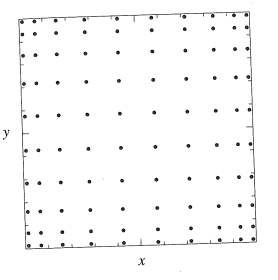




Let's test this out using a modified version of **Exercise 5.21c**.

A continuous distribution of electric charge lies over an $L\times L$ square. The charge density $\sigma$ in $Cm^{-2}$ is given by:

$$
\sigma(x,y) = q_o \sin(\frac{2\pi x}{L})\sin(\frac{2\pi y}{L})
$$

Calculate the potential of the sheet of charge at point P, a location on the xy-plane at x=0, y=Y.

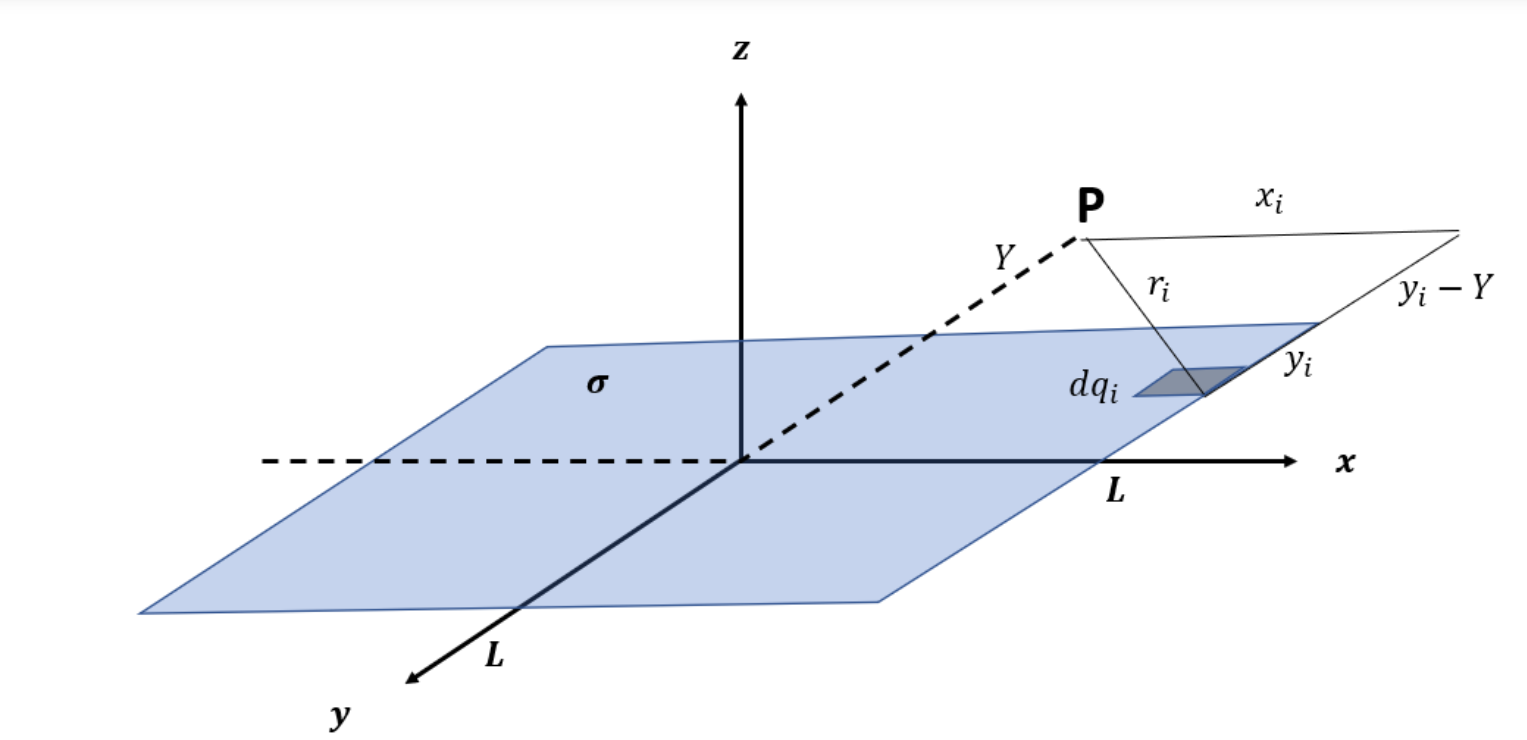

First let's just calculate and plot the sheet of charge using the above formula:

In [ ]:
# calculate and plot the surface charge density

import numpy as np
import matplotlib.pyplot as plt

# define the charge density function.
# Arguments x,y are coordinates, L is length of one side of surface area, m
def f(x,y,L):
    q_o = 100.0 # C/m2
    thetax = 2*np.pi*x/L
    thetay = 2*np.pi*x/L
    sigma = q_o*(np.sin(thetax)*np.sin(thetay))
    return sigma

# main body

# define side length L, m
L = 0.1


# create an array of size NxN to hold charge density
N = 100
density = np.empty([N,N], float)

# scale factor
scale = L/N

# calculate charge density at each point in array
for j in range(N):
    for i in range(N):
        density[j,i]=f(i*scale,j*scale,L)
        
plt.imshow(density, extent=[-L/2, L/2, -L/2, L/2])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar(label="Charge density C/m2")


We can write the potential of differential charge $dq_i$ at point $P$ as:

$$
dV_i(P) = k\frac{dq_i}{r_i}
$$

where k is the electric constant, ${1 \over {4\pi\epsilon_0}}$ and $r_i$ is the distance from point $P$ to the charge.

In terms of the charge density, $dq_i=\sigma dx dy$. 

We can write $r$ as $r=\sqrt{x_i^2+(y_i-Y)^2}$, where $Y$ is the distance point $P$ is from the sheet.

Therefore the total potential is given as:

$$
V(P) = \int_{-L/2}^{L/2}\int_{-L/2}^{L/2} \frac{\sigma(x,y)}{\sqrt{x_i^2+(y_i-Y)^2}}dxdy
$$

We can write this:

$$
V(P) = \int_{-L/2}^{L/2}\int_{-L/2}^{L/2} f(x,y)dxdy
$$

where 

$$
f(x,y) = \frac{q_o \sin(\frac{2\pi x}{L})\sin(\frac{2\pi y}{L})}{\sqrt{x_i^2+(y_i-Y)^2}}
$$

If we evaluate the integrals using Gaussian quadrature, the integral is approximated with:


$$
I \approx \sum_{i=1}^N\sum_{j=1}^Nw_iw_jf(x_i,y_i)
$$

where the sampling points and weights for each sum are scaled to the integration interval from -L/2 to L/2.

Let's write the code to do this.

First let's write our psuedo-code:

```python
# import the functions we need from numpy and gaussxw
# write a user-defined function for f(x,y) that accepts two arguments and returns one value for every set of (x,y)
# Main block of code
# create variables to store N, L, Y, and q_o
# calculate sampling points and weights for N points and scale to our integration range.
# use a nested for-loop to perform the double summation, looping over all N sampling points in both dimensions.
# Within the loop, keep a running sum.
# The last value of the sum is the integral.
```


In [ ]:
# import the functions we need from numpy and gaussxw
# write a user-defined function for f(x,y) that accepts two arguments and returns one value for every set of (x,y)
# Main block of code
# create variables to store N, L, Y, and q_o
# calculate sampling points and weights for N points and scale to our integration range.
# use a nested for-loop to perform the double summation, looping over all N sampling points in both dimensions.
# Within the loop, keep a running sum.
# The last value of the sum is the integral.

import numpy as np
from gaussxw import gaussxwab as gaxwab

## PH322 - Lecture #8, "Multiple Integrals": Section: "Pseudocode"

def f(x, y)
    gaxwab(N, a, b)
    return 69

def main():
    x = 0
    y = 0
    result = f(x, y)

    if (result != 69):
        print("The result of the double-integral was: " + str(result) + "!")
    else:
        print("bruh " + str(result) + "!")

    try:
        test = gaxwab(-100, -219312932, 21932193921392193)
    catch (ValueError):
        print("good")
    

if __name__ = "__main__":
    main()

## Derivatives

We next move away from numerical methods of integration to numerical methods of taking derivatives.

The numerical method is taken from the standard definition of the derivative of a the function $f(x)$:

$$
\frac{df}{dx} = \lim_{\delta \to 0}\frac{f(x+\delta) - f(x)}{\delta}
$$

Though numerically we can't ever set $\delta$ to 0, we can make it as small as we like. Doing so, the derivative is calculated simply as:

$$
\frac{df}{dx} = \frac{f(x+h) - f(x)}{h}
$$

where $h$ is our interval width. 

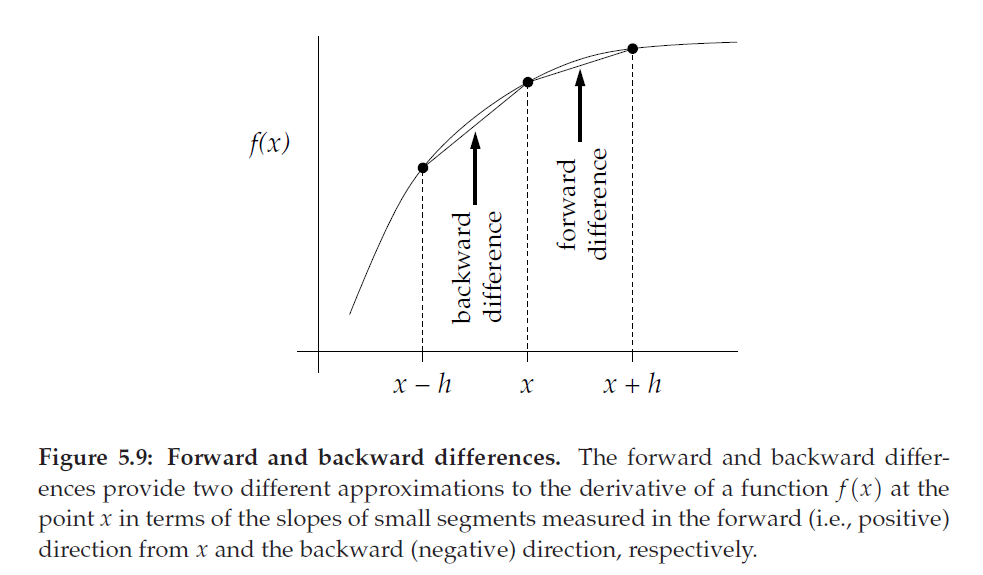

We can use Fig 5.9 to understand the different ways we can calculate the derivative at $x$. 

The definition of the derivative as written gives us the *forward difference* as you can see from the figure, because we use a point forward of $x$, i.e. $x+h$ to calculate the derivative. 

We could also include the point backward of $x$ to calculate the slope, i.e. $x-h$. This is the *backward difference* and the derivative calculated from it is simply:

$$
\frac{df}{dx} = \frac{f(x) - f(x-h)}{h}
$$


So let's use both methods and calculate the derivative of $f(x) = x^4 - 2x + 1$ at $x=1$. We will compare both derivatives to the analytic derivative $f'(x) =4x^3-2$.  

In [ ]:
# use both the forward and backward differences to calculate the derivative

# define our function
def f(x):
    return x**4-2*x+1

# define the analytic derivative to compare
def f1(x):
    return 4*x**3 - 2

# set our interval width
h = 1e-3

# set where we evaluate the derivative
x = 1

# calculate the true derivative useing the analytic derivative
true = f1(x)

# now calculate using the forward difference
f_dfdx = (f(x+h) - f(x))/h
f_error= abs(100*(true-f_dfdx)/true)

# now calculate using backward difference
b_dfdx = (f(x) - f(x-h) )/h
b_error= abs(100*(true-b_dfdx)/true)

print(f"df/dx using forward difference: {f_dfdx:0.5f} +/- {f_error:0.5f}%")
print(f"df/dx using backward difference: {b_dfdx:0.5f} +/- {b_error:0.5f}%")
print(f"Analytic df/dx: {f1(x):0.5f}")

We get an error of around 0.3%. We see we get slightly different results from each method. Without thinking about it too much, it appears we want to make $h$ as small as we can, to get the most accurate result. 

Is that true? 

Instead of testing out a bunch of $h$'s, let's plot the error of our numerical derivatives as a function of $h$:

In [ ]:
# error using the forward difference
def forward(h,x, true):
    dfdx = (f(x+h) - f(x))/h
    #return abs(100*(true-dfdx)/true)
    return abs(true-dfdx)

# error using the backward difference
def backward(h,x, true):
    dfdx = (f(x) - f(x-h) )/h
    #return abs(100*(true-dfdx)/true)
    return abs(true-dfdx)

# define the analytic derivative to compare
def f1(x):
    return 4*x**3 - 2


# create a range of h in powers of ten, from 1 to 10^(-15)
h= -np.arange(0,16,1,float)
h = 10**h

x = 1
true = f1(x)
f_error = forward(h,x, true)
b_error = backward(h,x, true)

plt.plot(h, f_error, label="forward")
plt.plot(h, b_error, label="backward")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("Absolute error")
plt.legend()

In [ ]:
np.min(f_error)

These are interesting results.

For starters we don't see much difference between the forward and backward differences. Both produce about the same error across this wide range of h.

Secondly, and somewhat surprisingly, the error actually increases for interval widths smaller than $10^{-8}$. The most accurate results are when h $\sim 10^{-8}$.

Finally, even the best error isn't that great. The lowest relative error is of order $10^{-6}$ or an absolute error of order $10^{-8}$.  While this isn't awful, it's far from the numerical precision of rounding error. It is much worse than the accuracy we achieved with our numerical integration methods. 

It turns out this is about the best we can achieve with numerical differentiation. 

To see why we make a Taylor series expansion of $f(x+h)$ around $x$, and get this series for the derivative of $f$ at $x$:

$$
f'(x) = \underbrace{\frac{f(x+h) - f(x)}{h}}_{\text{forward difference derivative}} - \underbrace{\frac{1}{2}hf''(x) + ...}_{\text{approximation error}}
$$



We see the first term is how we calculate the forward difference derivative. We see it is not exact, and the approximation error is the sum of all the terms we omit. The biggest error term is proportional to $h$. So from this, we expect the approximation error to decrease as $h$ gets smaller. 

We do see this happen up to $h \sim 10^{-8}$. But why does the approximation error get bigger after this?

Well, the first term includes the difference of two numbers. When $h$ is small, $f(x+h)$ and $f(x)$ are nearly the same. As we saw in chapter 4, taking differences of two like numbers produces large rounding errors. The smaller $h$ gets the bigger the rounding error.

So we see there is a tug-of-war between the numerical error and approximation error when we numerically calculate derivatives. Decreasing $h$ decreases the approximation error but increases the numerical error. This makes the total error smaller up to a point, when increases in rounding error take over. Therefore there is some sweet spot for $h$ that minimizes total error.

The total error is the sum of the approximation error and rounding error. We can write it as:

$\epsilon$ = approximation_error + rounding_error

$
= \frac{1}{2}hf''(x) + 2Cf(x)/h
$

where $C$ is our error constant $10^{-16}$.


We want to find the $h$ that minimizes the error, so we take the partial derivative of $\epsilon$, set it equal to zero, then solve for $h$.

Doing so, we find that the minimum error occurs at 

$$
h = \sqrt{4C\left|\frac{f(x)}{f''(x)}\right|}
$$,

where C is our error constant, $10^{-16}$.

For the function we used above, $f(x)$ and $f''(x)$ are both of order 1, meaning the sweet spot for $h$ should be ~ $\sqrt{(4)10^{-16}}$ or $~ 2\times 10^{-8}$ which is in fact what we saw.

The error for this value of $h$ is given by:

$
\epsilon = \sqrt{4C\left|f(x)f''(x)\right|}
$

Again, if both $f(x)$ and $f''(x)$ are of order 1, we expect an error of $\sqrt{(4)10^{-16}}$, or about $ ~ 2\times 10^{-8}$, which is again what we observed above.



### Central differences

There is one trick we can do to improve the accuracy of the derivative. That is to use the central difference, not the forward nor backward difference.

The central difference is defined:

$$
\frac{df}{dx} = \frac{f(x+h/2) - f(x-h/2)}{h}
$$

You can see the derivative at x is calculated at two points $h/2$ from $x$. Using a Taylor series expansion of both $f(x+h/2)$ and $f(x-h/2)$ and a bit of algebra we find:

$$
f'(x) = \underbrace{\frac{f(x+h/2) - f(x-h/2)}{h}}_{\text{central difference}} -\underbrace{\frac{1}{24}h^2f'''(x) + ...}_{\text{approximation error}}
$$

Doing so, we see the first term is just the central difference method. But now we see the approximation error is proportional to $h^2$ not $h$, meaning it decreases faster than in either the forward or backward differences. If it decreases fast enough, we may be able to achieve a lower total error. 

Let's find out! The code below is similar to above, but now I add in the error calculated using the central difference method.



In [ ]:
# compare error on the derivative using the central difference method

# error using the forward difference
def forward(h,x, true):
    dfdx = (f(x+h) - f(x))/h
    return abs(true-dfdx)

# error using the backward difference
def backward(h,x, true):
    dfdx = (f(x) - f(x-h) )/h
    return abs(true-dfdx)

# error using the central difference
def central(h,x, true):
    dfdx = (f(x+h/2) - f(x-h/2) )/h
    return abs(true-dfdx)

# define the analytic derivative to compare
def f1(x):
    return 4*x**3 - 2


# create a range of h in powers of ten, from 1 to 10^(-15)
h= -np.arange(0,16,1,float)
h = 10**h

x = 1
true = f1(x)
f_error = forward(h,x, true)
b_error = backward(h,x, true)
c_error = central(h,x, true)

plt.plot(h, f_error, label="forward")
plt.plot(h, b_error, label="backward")
plt.plot(h, c_error, label="central")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("Absolute error, %")
plt.legend()

In [ ]:
print(f"Minimum forward difference error = {np.min(f_error)}")
print(f"Minimum backward difference error = {np.min(b_error)}")
print(f"Minimum central difference error = {np.min(c_error)}")

As expected we do see a smaller minimum error, an absolute error on the order of  $10^{-11}$, about 1000 times smaller than using either the forward or backward difference. We also see the error occurs at larger value of $h$. Again this makes sense because the approximation error term in the Taylor's expansion is proportional to $h^2$, so the approximation error decreases faster.

Like above we can also derive equations for the optimal $h$ and the associated error when using the central difference. The equivalent equations are:

$$
h = \left(24C \left|\frac{(f(x)}{f'''(x)} \right| \right)^{1/3}
$$

and

$$
\epsilon = \left(\frac{9} {8}C^2\left[f(x)\right]^2\left|f'''(x)\right|\right)^{1/3}
$$

So here we expect $h~((24)(10^{-16}))^{1/3}\sim 1.3\times 10^{-5}$, and $\epsilon ~ (\frac{9}{8}(10^{-16})^{2})^{1/3} \sim 2.2\times 10^{-11}$, both agree with our observations. 